
# **나의 해방일지**

---

# 12월 11일 <br>
지금껏 CNN 모델을 이용하였는데, 문제에서 Fully Connected Network을 사용해야한다는 사실을 식별하였다. 
그래서 Fully connected Network을 만들고, CNN 모델과 성능을 비교해보고자 한다.
## 과정
1. Fully Connected Network은 총 4개 layer에 함수는 ReLU 함수를 사용하고, 각 layer을 통과할 때마다 batchnormalization을 거치게 하였다.
2. optimizer은 adam을 사용하였고, 총 epoch은 30을 사용하였다.

##결론 

CNN 모델보다 Accuracy가 낮지만 inference을 할 것이다.<br>
Accuracy: 98.24


In [32]:
import torch
from torch import nn
from torchvision import datasets, transforms 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
%config InlineBackend.figure_format='retina'

In [34]:
torch.manual_seed(316)

In [57]:
transform = transforms.Compose(
  [
    transforms.ToTensor(),
    transforms.Normalize((0.1307), (0.3081)),
] )

In [58]:
dataset=datasets.MNIST('.',download=True,train=True,transform=transform)

In [59]:
len_trainset = int(len(dataset) * 0.8)
len_valset = len(dataset) - len_trainset
trainset, valset = torch.utils.data.random_split(dataset, [len_trainset, len_valset])

In [60]:
batch_size = 64
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True
)

In [61]:
valloader = torch.utils.data.DataLoader(
  valset,
  batch_size=batch_size,
  shuffle=True )

In [62]:
images, labels = next(iter(trainloader))
images.shape

torch.Size([64, 1, 28, 28])

In [68]:
class fcn(nn.Module):

    def __init__(self):
        super().__init__()
         
        self.linear = nn.Sequential(
            nn.Linear(784, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
 
    def forward(self, x):
        model = self.linear(x)
        return model

model = fcn()
print(model)

fcn(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=64, bias=True)
  )
)


In [70]:
 idx_to_class = { v:k for k, v in trainset.dataset.class_to_idx.items() } 
 idx_to_class

{0: '0 - zero',
 1: '1 - one',
 2: '2 - two',
 3: '3 - three',
 4: '4 - four',
 5: '5 - five',
 6: '6 - six',
 7: '7 - seven',
 8: '8 - eight',
 9: '9 - nine'}

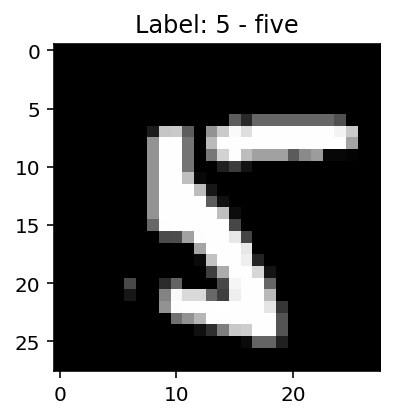

In [71]:
fig, ax = plt.subplots(figsize=(3,3))
img_idx = 0
label = idx_to_class[int(labels[0])]
ax.imshow(images[0][0], cmap="gray")
ax.set_title(f"Label: {label}")
plt.show()

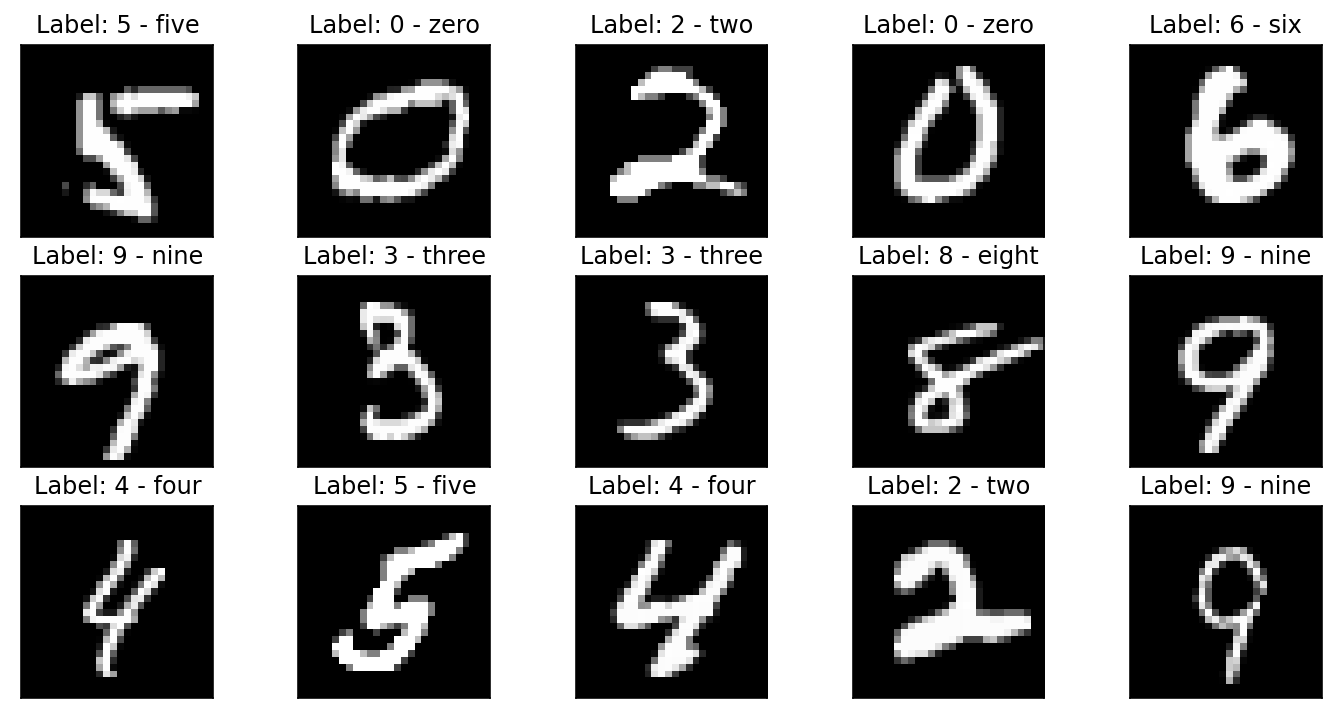

In [72]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(12,6))
ax = np.ravel(ax)
for index in range(15): 
  ax[index].imshow(images[index][0], cmap="gray")
  label = idx_to_class[int(labels[index])] 
  ax[index].set_title(f"Label: {label}") 
  ax[index].set_xticks([]) 
  ax[index].set_yticks([])
plt.show()

In [73]:
total_params = 0
for name, param in model.named_parameters():
    print(name, param.shape, param.numel())
    total_params += param.numel()
print(f"Total number of parameters = {total_params}")

linear.0.weight torch.Size([512, 784]) 401408
linear.0.bias torch.Size([512]) 512
linear.1.weight torch.Size([512]) 512
linear.1.bias torch.Size([512]) 512
linear.3.weight torch.Size([256, 512]) 131072
linear.3.bias torch.Size([256]) 256
linear.4.weight torch.Size([256]) 256
linear.4.bias torch.Size([256]) 256
linear.6.weight torch.Size([128, 256]) 32768
linear.6.bias torch.Size([128]) 128
linear.7.weight torch.Size([128]) 128
linear.7.bias torch.Size([128]) 128
linear.9.weight torch.Size([64, 128]) 8192
linear.9.bias torch.Size([64]) 64
Total number of parameters = 576192


In [74]:
import time

from torch import optim
# set up an optimizer (pass parameters to be optimized and a learning rate)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
# define the loss
criterion = nn.CrossEntropyLoss()

In [75]:
 import torch
 
 device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
 device

 model.to(device)

fcn(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=64, bias=True)
  )
)

In [77]:
start_time = time.time()
n_epochs = 30
train_loss_history = []
val_loss_history = []
accuracy_history = []
for epoch in range(n_epochs): 
  train_loss = 0
  model.train()
  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device) # zero the gradients on each training pass
    optimizer.zero_grad()
    # make a forward pass through the network
    logits = model.forward(images.view(-1, 28 * 28))
    # use the network output to calculate the loss (output vs. ground truth)
    loss = criterion(logits, labels)
        # make a backward pass through the network to calculate the gradients (backpropagation)
    loss.backward()
    # update the weights
    optimizer.step()
    # keep track of the loss per epoch
    train_loss += loss.item() 
  else:
    train_loss = train_loss / len(trainloader)
    train_loss_history.append(train_loss)
    val_loss = 0
    accuracy = 0
    with torch.no_grad(): 
      model.eval()
      for images, labels in valloader:
        images, labels = images.to(device), labels.to(device) 
        logits = model.forward(images.view(-1, 28 * 28))
        loss = criterion(logits, labels)
        val_loss += loss.item()
        probabilities = logits.softmax(dim=1)
        top_probs, top_classes = probabilities.topk(k=1, dim=1)
        corrects = (top_classes == labels.view(*top_classes.shape))          
        accuracy += torch.mean(corrects.type(torch.FloatTensor))
    val_loss = val_loss / len(valloader)
    val_loss_history.append(val_loss)
    accuracy = accuracy / len(valloader)
    accuracy_history.append(accuracy)
    metrics = f"Epoch: {epoch + 1:02}/{n_epochs:02}" 
    metrics += " | "
    metrics += f"Train loss: {train_loss:.3f}" 
    metrics += " | "
    metrics += f"Validation loss: {val_loss:.3f}" 
    metrics += " | "
    metrics += f"Accuracy: {accuracy:.3f}" 
    print(metrics)
print("Elapsed: {0:.2f} seconds".format(time.time() - start_time))

Epoch: 01/30 | Train loss: 0.170 | Validation loss: 0.121 | Accuracy: 0.973
Epoch: 02/30 | Train loss: 0.093 | Validation loss: 0.096 | Accuracy: 0.975
Epoch: 03/30 | Train loss: 0.058 | Validation loss: 0.082 | Accuracy: 0.978
Epoch: 04/30 | Train loss: 0.040 | Validation loss: 0.073 | Accuracy: 0.979
Epoch: 05/30 | Train loss: 0.029 | Validation loss: 0.072 | Accuracy: 0.979
Epoch: 06/30 | Train loss: 0.021 | Validation loss: 0.080 | Accuracy: 0.977
Epoch: 07/30 | Train loss: 0.017 | Validation loss: 0.073 | Accuracy: 0.979
Epoch: 08/30 | Train loss: 0.014 | Validation loss: 0.081 | Accuracy: 0.977
Epoch: 09/30 | Train loss: 0.011 | Validation loss: 0.076 | Accuracy: 0.979
Epoch: 10/30 | Train loss: 0.012 | Validation loss: 0.071 | Accuracy: 0.982
Epoch: 11/30 | Train loss: 0.009 | Validation loss: 0.075 | Accuracy: 0.979
Epoch: 12/30 | Train loss: 0.009 | Validation loss: 0.075 | Accuracy: 0.978
Epoch: 13/30 | Train loss: 0.009 | Validation loss: 0.081 | Accuracy: 0.978
Epoch: 14/30

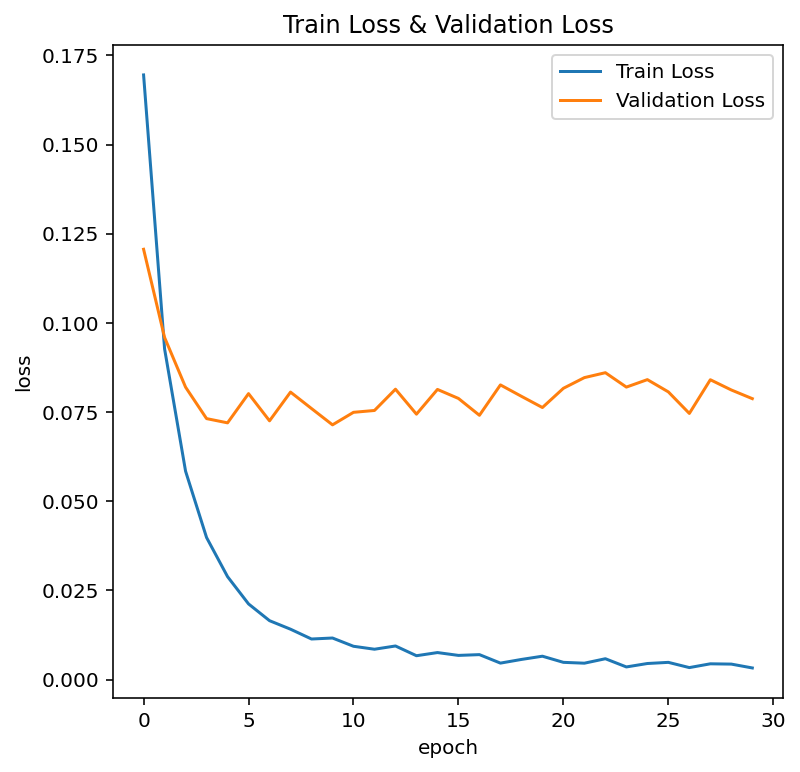

In [78]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(train_loss_history, label="Train Loss")
ax.plot(val_loss_history, label="Validation Loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("Train Loss & Validation Loss")
ax.legend()
plt.show()

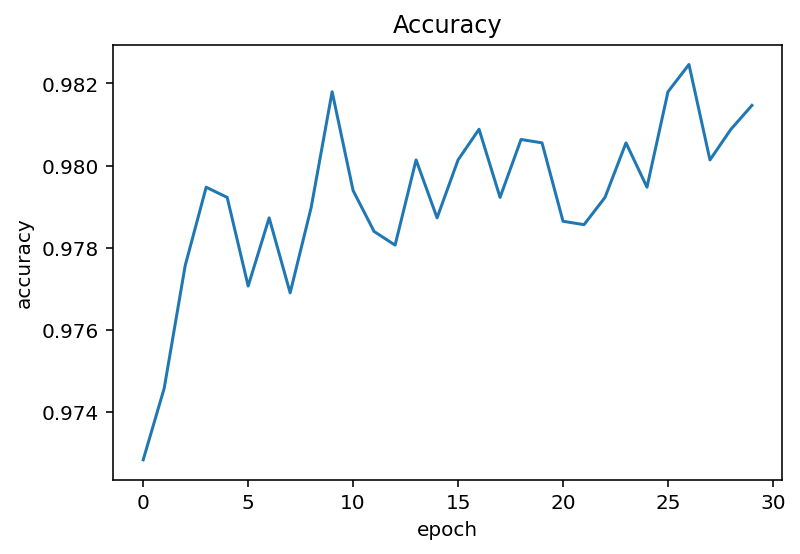

In [79]:
fig, ax = plt.subplots()
ax.plot(accuracy_history, label="Accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy")
plt.show()

In [80]:
# download the testset
testset = datasets.MNIST('.', download=True, train=False, transform=transform)
# loader for the testset
testloader = torch.utils.data.DataLoader( testset,
batch_size=batch_size,
shuffle=True
)

In [83]:
total = 0 
total_corrects = 0 
with torch.no_grad():
  for images, labels in testloader:
    images, labels = images.to(device), labels.to(device) 
    logits = model.forward(images.view(-1, 28 * 28))
    probabilities = logits.softmax(dim=1)
    top_probs, top_classes = probabilities.topk(k=1, dim=1)
    corrects = (top_classes == labels.view(*top_classes.shape))
    corrects = int(torch.sum(corrects).cpu().numpy())
    total_corrects += corrects
    total += labels.size(0)

In [84]:
total_corrects / total * 100.0

98.24000000000001

In [85]:
torch.save(model.state_dict(), '/content/drive/MyDrive/model_1211.pth')